# Configuring matplotlib figures interactively

In this exercise, you will use IPython's interactive widget functionality to develop tools that can help you to tweak your matplotlib figures. Matplotlib figures have dozens of attributes that can be configured: line styles, colors, markers, fonts, etc.  Here, we will develop a simple tool to configure some of those attributes interactively on an existing figure.

To carry out this exercise, it will help you to understand how matplotlib is structured internally. In addition to its own [extensive documentation](http://matplotlib.org/contents.html), we have provided as a quick reference a companion notebook called ["matplotlib, beyond the basics"](matplotlib_beyond_basics.ipynb) that walks you through how the architecture of matplotlib is assembled.  You may find it useful to refer to it while you work on this exercise.

We begin with the standard setup for matplotlib:

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

Make a figure, store it as fig.  Since we're going to be transforming the figure later on, we need to hold on to a reference to it.

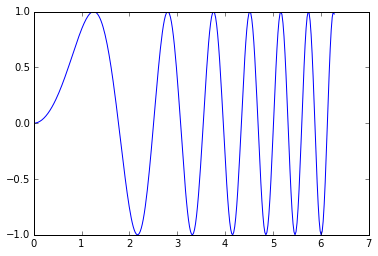

In [6]:
fig, ax = plt.subplots()
t = np.linspace(0, 2*np.pi, 300)
s = np.sin(t**2)
ax.plot(t, s);

In [8]:
# Press tab at the end of this to see what you can modify
ax.set_

Now, we load the IPython `interact` tools:

In [15]:
from IPython.html.widgets import interact
from IPython.display import display

And we can now begin to use this to tweak the properties of the plot. For example, let's define an interactive function that allows us to change the x and y labels of the plot:

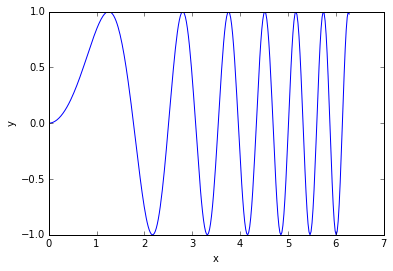

In [17]:
@interact
def xylabels(xlabel="x", ylabel="y"):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    display(fig)    

As you make many adjustments, if you have a complex figure, the continuous re-execution of the interactive function may become slow. In that case, instead of using `interact`, it may be preferable to use `interact_manual`, which works otherwise identically to `interact`, but must be triggered manually by clicking on a button:

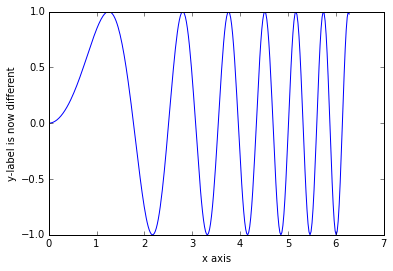

In [36]:
ax.figure

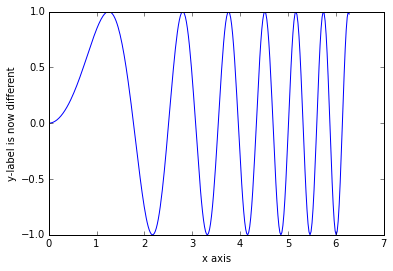

In [18]:
from IPython.html.widgets import interact_manual

@interact_manual
def xylabels(xlabel="x", ylabel="y"):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    display(fig)    

The above examples have relied on working with the global variables `fig` and `ax`, but in general it's not a good idea to rely on specifically named globals. Instead, it is much better to write a function that takes the axis object as an argument explicitly.

Here, we see how to do that, by building an internal function that does the actual editing, and wrapping it in an outer function that takes our axis object as an argument. This also gives us the opportunity to, for example, provide a calling interface where we can choose at call time whether to activate the execution mode to be manual or automatic:

In [43]:
from IPython.html.widgets import fixed

def edit_labels(ax, manual=False):
    """Edit the labels of an axis object.
    
    Provide a graphical editor for the x, y and title labels of an axis.
    
    If the `manual` flag is True, the editor will have a "Run" button
    to trigger execution, otherwise it will execute automatically any
    time any of the labels changes (which could be slow for a complex
    figure.)
    """
    
    def edit(xlabel, ylabel, title):
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        display(ax.figure)
        
    interact_call = interact_manual if manual else interact
    interact_call(edit, ax=fixed(ax), xlabel="x", ylabel="y", title="title")

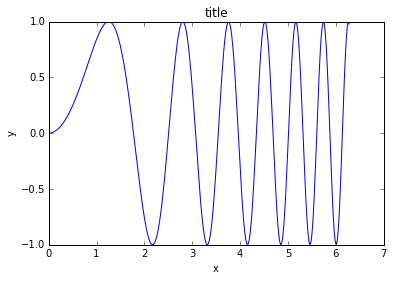

In [44]:
edit_labels(ax)

And we can still see our figure later, since we still have a reference to it:

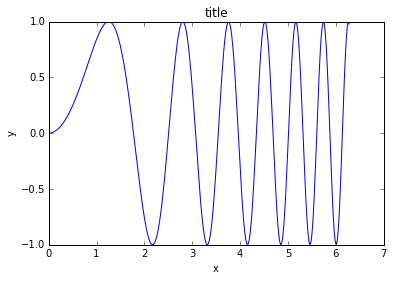

In [45]:
ax.figure

For the rest of this exercise, you should explore what other properties you can change, of the many matplotlib has, and how to do so in combination with the IPython widget framework.

For example, some ideas:

- For setting x/y limits, our `FloatRangeSlider` provides a widget that can set low/high limits in one shot.
- For line properties, you can build a drop-down selectors or other widgets that consider the valid values from the [matplotlib documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).
- You can even consider offering to change the kind of plot used: log/linear on either x or y axes.

This is an open-ended exercise.  Furthermore, we will later present how to do some of these things in a more automatic way, though one that requires using more sophisticated programming techniques.